# Introduction to Neural Networks

In this post we will explore neural networks and how they work. This is aimed to be an introduction to the topic so I will not go into detail about the specifics of some of the components of the learning, but after reading this you should have a good idea about **how** neural networks work and **why** they are so powerful.

## Goal

Ultimately, the goal of this post is to build a neural network that will approximate this function:
$$
f(x, y) = \sin(2x)\sin(2y)
$$
The reason it is useful to have a machine that can do this is in real life we do not know the function that will generate the data we see. We do not have a function that takes in today's date, and other parameters and gives you the weather. What we can do, is use data we have observed, and train a approximator (neural network in this example) to mimic the input output that we see. 

The goal of pretty much the entire field of machine learning is how to build smart architectures that can learn to approximate complicated functions. 

## Simplification

Before we even start the approximation of $f$, we will try and approximate a simpler function:
$$
g(x) = \cos(2x)
$$
The reason I am doing this simplification is that the backbone of machine learning, what is called **backpropogation** operates in a very high dimensional space this makes it very hard to image what is going on. We cannot picture a shape in 100 dimensions, our brains are limited to 3. Fortunately, the same idea holds in all finite dimensions so we can motiviate it in a place we are all fimiliar.

### Simple Approximator

As I said, a neural network is simply a tool to approximate functions. So, let us create an approximator for $g$ of the form:

$$g^*(x, \theta, b) = \theta x + b$$

Where $\theta$ and $b$ are the parameters of our model, they are the things that are in our control to change but they are just numbers, numbers we can change. For example, $\theta = 0.1, \ b = 1$.

In [14]:
#IGNORE
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
import numpy as np

plt.style.use("ggplot")

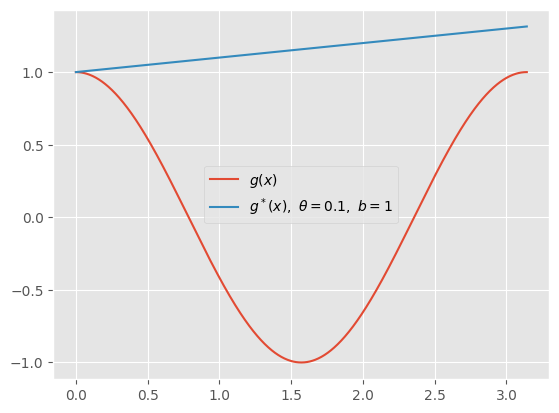

In [13]:
#IGNORE
simple_x_values = np.linspace(0, np.pi, 1000)
simple_y_values = np.cos(2 * simple_x_values)
simple_pred_values = 0.1 * simple_x_values + 1

plt.plot(simple_x_values, simple_y_values, label=r"$g(x)$")
plt.plot(simple_x_values, simple_pred_values, label=r"$g^*(x), \ \theta = 0.1, \ b = 1$")

plt.legend()
plt.show()


As we can see, the approximation we have made is very bad but that is ok. What machine learning is all about is making these approximation better by adjusting the parameters in out approximator. The question is how?

## How to change parameters? 

We we have so far is a approxmator, $g^*$, that is bad at approximating. But how do we know it is bad? Well, the simplest measure of this would be to sum the difference between the actual output we want, and the output we got:
$$
\sum_{x \in X} g(x) - g^*(x)
$$

The reason this does not really work is if a guess, $g^*(x)$ is too large, the error will be negative, and if its too small it will be positive. But we don't really care if the guess is too big or too small - we just care that it is wrong. So we typically take the square in the sum:
$$
loss(\theta, b) := \sum_{x \in X} \left(g(x) - g^*(x)\right)^2
$$

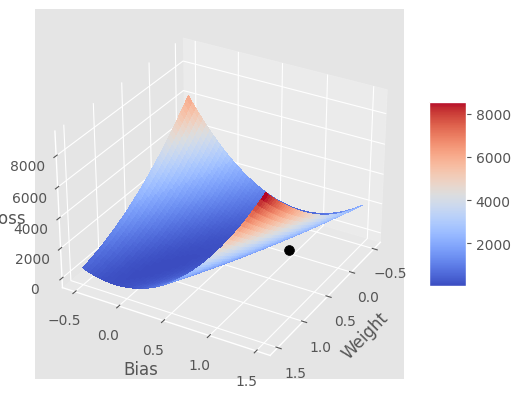

In [42]:
#IGNORE
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm


def loss(w, b):
    pred_values = w * simple_x_values + b
    return sum((simple_pred_values - pred_values) ** 2)


dimension = 50

weights = np.linspace(-0.5, 1.5, dimension)
biases = np.linspace(-0.5, 1.5, dimension)

weights_biases = np.array(list(itertools.product(weights, biases)))
losses = np.array([loss(w, b) for w, b in weights_biases])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(azim=30)

X, Y = np.meshgrid(weights, biases)
Z = losses.reshape(dimension, dimension)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

w_opt, b_opt = 0.1, 1
loss_opt = loss(w_opt, b_opt)

ax.scatter(w_opt, b_opt, loss_opt, color="black", s=50, label="Optimal Point")

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Loss", labelpad=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [58]:
x_values = jnp.linspace(-jnp.pi, jnp.pi, 100)
y_values = jnp.cos(2 * x_values)

def forward(x, weight, bias):
    return x * weight + bias

def compute_loss(weight, bias, x_values, y_values):
    y_pred = forward(x_values, weight, bias)
    loss = jnp.sum((y_pred - y_values) ** 2)
    return loss

def compute_loss_wrapper(weight_bias, x_values, y_values):
    weight, bias = weight_bias
    return compute_loss(weight, bias, x_values, y_values)

dimension = 50

weights = jnp.linspace(-0.3,  0.5, dimension)
biases = jnp.linspace(-0.5,  0.5, dimension)

weights_biases = jnp.array(list(itertools.product(weights, biases)))
vec_compute_loss = jax.vmap(compute_loss_wrapper, in_axes=[0, None, None])
losses = vec_compute_loss(weights_biases, x_values, y_values)

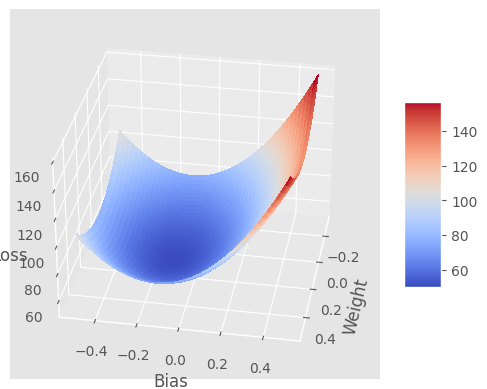

In [ ]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(azim=10)

X, Y = jnp.meshgrid(weights, biases)
R = jnp.sqrt(X**2 + Y**2)
Z = losses.reshape(dimension, dimension)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Loss", labelpad=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()